# Customer Segmentation using Clustering

In [39]:
%matplotlib inline
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import scipy.spatial.distance as spd
import numpy as np

# Setup Seaborn
sns.set_style("whitegrid")
sns.set_context("poster")

# Setup working directory
os.chdir('C:/Users/Frank/Desktop/Python_Springboard/Clustering_project/1479758358_clustering/clustering')

## Data

The dataset contains information on marketing newsletters/e-mail campaigns and transaction data from customers. The transactional data shows which offer customers responded to and customer purchases. The data is presented as an Excel workbook containing two worksheets. 

In [11]:
df_offers = pd.read_excel("./WineKMC.xlsx", sheet_name=0)
df_offers.columns = ["offer_id", "campaign", "varietal", "min_qty", "discount", "origin", "past_peak"]
df_offers.head()

,offer_id,campaign,varietal,min_qty,discount,origin,past_peak
0,1,January,Malbec,72,56,France,False
1,2,January,Pinot Noir,72,17,France,False
2,3,February,Espumante,144,32,Oregon,True
3,4,February,Champagne,72,48,France,True
4,5,February,Cabernet Sauvignon,144,44,New Zealand,True


In [13]:
df_transactions = pd.read_excel("./WineKMC.xlsx", sheet_name=1)
df_transactions.columns = ["customer_name", "offer_id"]
df_transactions['n'] = 1
df_transactions.head()

,customer_name,offer_id,n
0,Smith,2,1
1,Smith,24,1
2,Johnson,17,1
3,Johnson,24,1
4,Johnson,26,1


## Data wrangling

In [27]:
df_merged = df_offers.merge(df_transactions, how='inner', on='offer_id')
df_merged.head()


,offer_id,campaign,varietal,min_qty,discount,origin,past_peak,customer_name,n
0,1,January,Malbec,72,56,France,False,Thomas,1
1,1,January,Malbec,72,56,France,False,Jackson,1
2,1,January,Malbec,72,56,France,False,Mitchell,1
3,1,January,Malbec,72,56,France,False,Peterson,1
4,1,January,Malbec,72,56,France,False,Wood,1


In [46]:
pivoted_df = pd.pivot_table(df_merged, values = 'n', index = 'customer_name', columns = 'offer_id', fill_value = 0)
pivoted_df.head()

offer_id,1,2,3,4,5,6,7,8,9,10,...,23,24,25,26,27,28,29,30,31,32
customer_name,,,,,,,,,,,,,,,,,,,,,
Adams,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
Allen,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
Anderson,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
Bailey,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
Baker,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0


## K-Means Clustering



In [30]:
# make the index into a column
X = pivoted_df.reset_index()

# only use 1/0's for training
X_train = X[X.columns[1:]]

# save a list of the 0/1 columns
x_cols = pivoted_df.columns[1:]

## The Silhouette Method



Automatically created module for IPython interactive environment
For n_clusters = 2 The average silhouette_score is : 0.09365573283492713


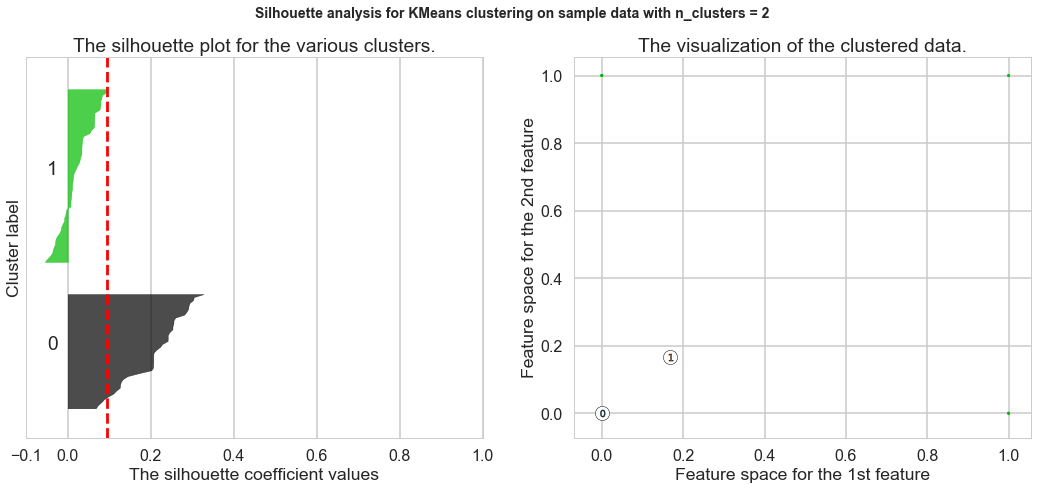

For n_clusters = 3 The average silhouette_score is : 0.11889942863638556


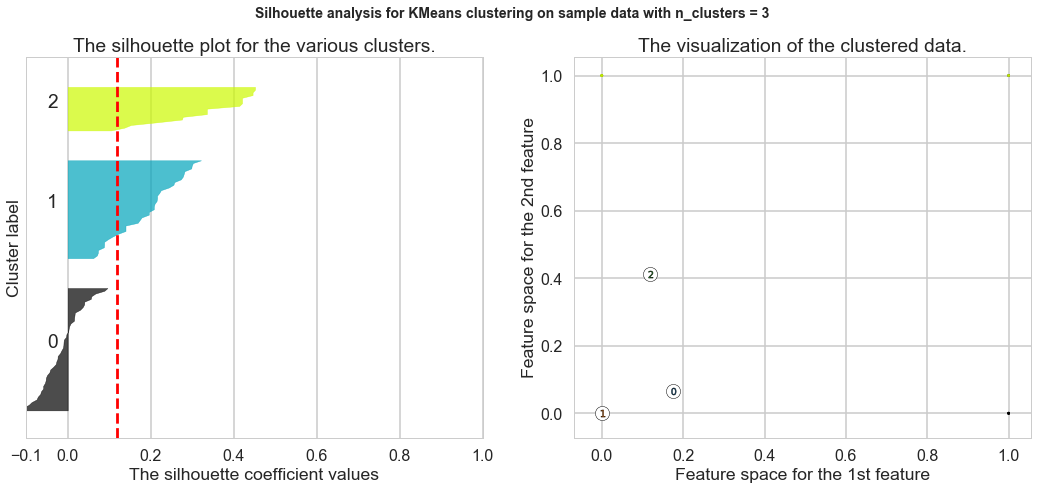

For n_clusters = 4 The average silhouette_score is : 0.12347053919571699


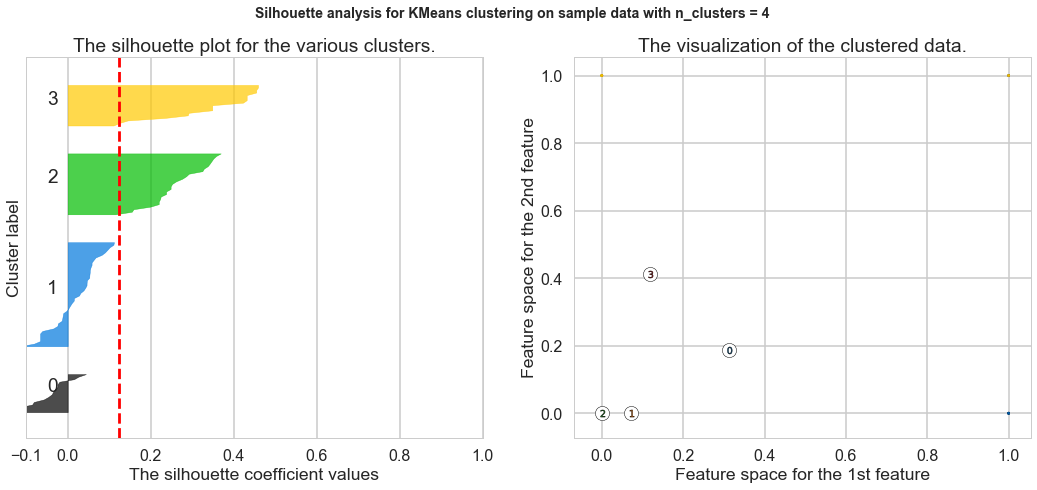

For n_clusters = 5 The average silhouette_score is : 0.14092516241984757


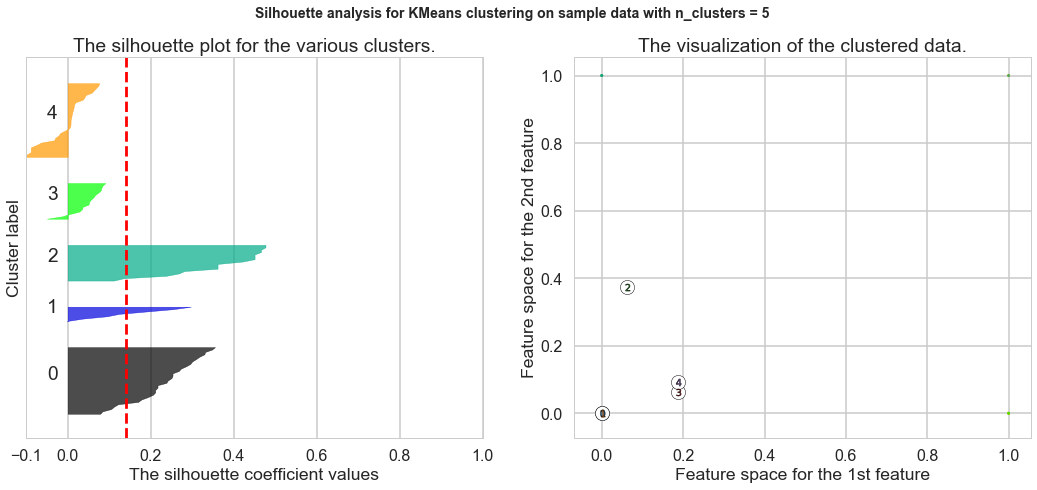

For n_clusters = 6 The average silhouette_score is : 0.1371798939109807


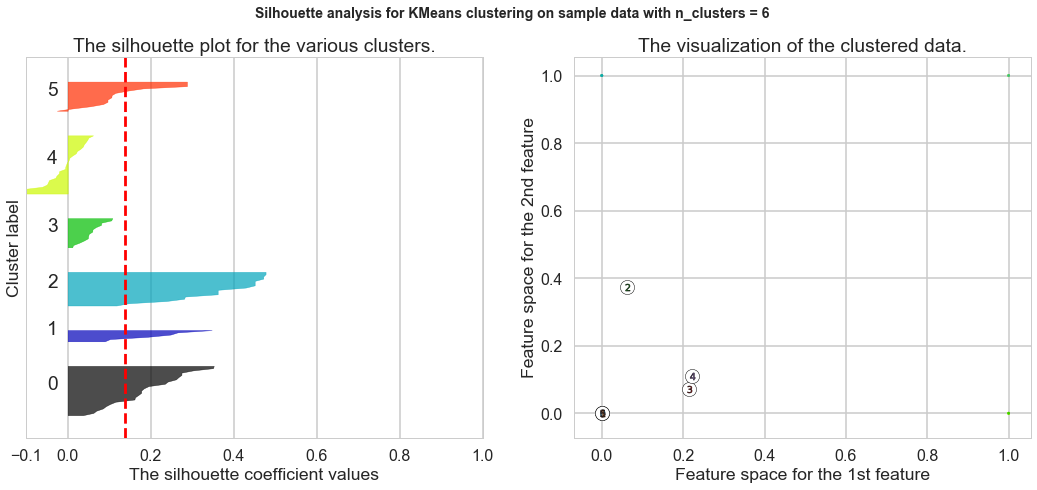

In [110]:
from __future__ import print_function

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

print(__doc__)



range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(pivoted_df) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(pivoted_df)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(pivoted_df, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(pivoted_df, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(pivoted_df.iloc[:, 0], pivoted_df.iloc[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()

## The Elbow Sum-of-Squares Method

In [84]:
# set K value range
K = range(2,11)

# create one model for each k
kmeans_models = [KMeans(k).fit(X_train[1:]) for k in K]

# find the centroids for each model
centroids = [m.cluster_centers_ for m in kmeans_models]

# calculate the distance of every point
D_k = [spd.cdist(X_train,cent,'euclidean') for cent in centroids]

# find the min distance
cIdx = [np.argmin(D,axis=1) for D in D_k]
dist = [np.min(D,axis=1) for D in D_k]

# calculate sum of squares
avgWithinSS = [sum(d)/X_train.shape[0] for d in dist]

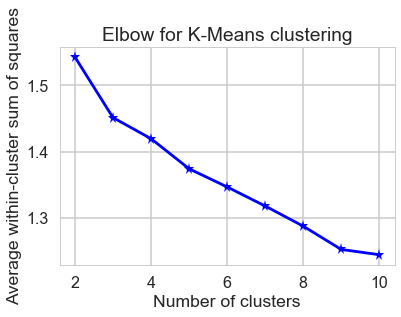

In [85]:
# plot elbow curve
plt.plot(K, avgWithinSS, 'b*-')
plt.xlabel('Number of clusters');
plt.ylabel('Average within-cluster sum of squares');
plt.title('Elbow for K-Means clustering');

In [54]:
assert range is __builtins__.range

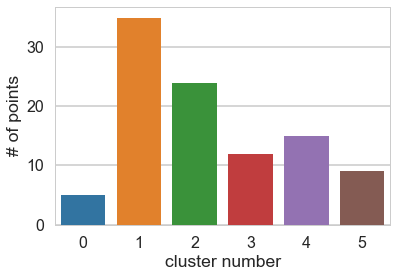

In [57]:
cluster = KMeans(n_clusters=6)
X['cluster_labels'] = cluster.fit_predict(X_train)
cluster_counts = X.cluster_labels.value_counts(sort=False)
sns.barplot(x = list(range(6)), y = cluster_counts);
plt.xlabel('cluster number');
plt.ylabel('# of points');

## Principle Component Analysis



In [59]:
from sklearn.decomposition import PCA

# make new copy of data
X_pca = X_train.copy()

# create and fit pca
pca = PCA(n_components=2)
pca.fit(X_pca.T)

# print results
print('explained variance ratio:', pca.explained_variance_ratio_)
print('components shape:', pca.components_.shape)


explained variance ratio: [0.14890496 0.10410638]
components shape: (2, 100)


In [60]:
# create individual Series for columns
names = pd.Series(X['customer_name'])
clusters = pd.Series(X['cluster_labels'])
pca1 = pd.Series(pca.components_[0])
pca2 = pd.Series(pca.components_[1])

# bring individual series together into a dataframe
pca_df = pd.DataFrame({'Customer Name': names, 'Cluster ID': clusters, 'x': pca1, 'y': pca2})
pca_df = pca_df[['Customer Name', 'Cluster ID', 'x', 'y']]
pca_df.head(10)

,Customer Name,Cluster ID,x,y
0,Adams,2,0.177320,-0.036973
1,Allen,1,-0.030010,0.018504
2,Anderson,3,-0.050420,-0.158756
3,Bailey,2,0.131957,0.003854
4,Baker,1,0.043677,0.092959
5,Barnes,4,-0.033440,0.161097
6,Bell,3,-0.081941,-0.254357
7,Bennett,2,0.119986,-0.012876
8,Brooks,4,0.026022,0.122389
9,Brown,2,0.193380,-0.017435


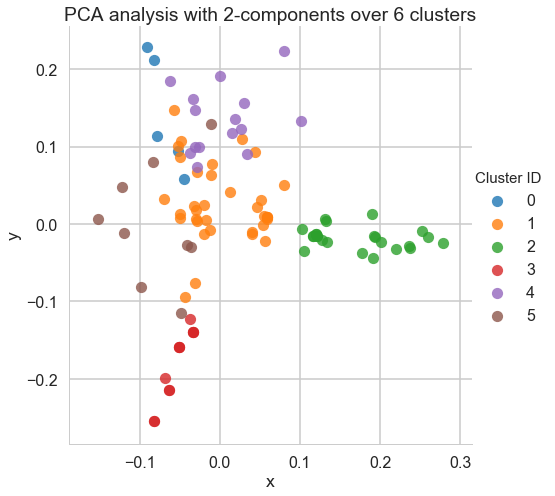

In [61]:
sns.lmplot(x="x", y="y", data=pca_df, hue='Cluster ID', fit_reg=False, size = 7);
plt.title('PCA analysis with 2-components over 6 clusters');

In [86]:
# The clustering looks okay, except that blue is dispersed the beige group and brown/beige are somewhat clumped together.

In [87]:
# Initialize a new PCA model with a default number of components.
variances = []

for dim in [2,3,4,5,6,7,8,9,10]:
    # create and fit pca
    pca = PCA(n_components=dim)
    pca.fit(X_pca.T)
    # store explained variance
    variances.append(sum(pca.explained_variance_))

In [88]:
variances

[2.311278985287212,
 2.9539708408285463,
 3.549600493470474,
 4.032686232547565,
 4.485121507356319,
 4.925379643073173,
 5.337916120052241,
 5.706682608007395,
 6.059969719389486]

## Cluster using the following algorithms and compare results:
1. Affinity propagation
2. Spectral clustering
3. Agglomerative clustering
4. DBSCAN

In [93]:
from sklearn.cluster import AgglomerativeClustering, DBSCAN, AffinityPropagation, SpectralClustering

In [105]:
X = pivoted_df[x_cols]
#affinity propgation

model = AffinityPropagation()
labels = model.fit_predict(X)
silhouette = silhouette_score(X, labels)
print('Affinity Propogation:', silhouette)

Affinity Propogation: 0.1276758798641375


Text(0,0.5,'silhouette score')

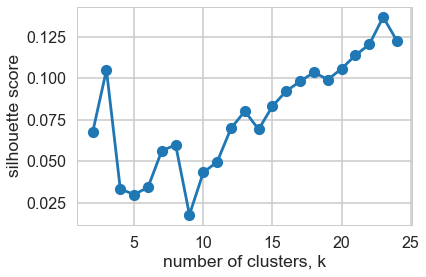

In [106]:
#spectral clustering

n_clusts = range(2,25)
silhouette=[]

for k in n_clusts:
    model = SpectralClustering(n_clusters=k, random_state=10)
    labels = model.fit_predict(X)
    silhouette.append(silhouette_score(X, labels))

# Plot 
plt.plot(n_clusts, silhouette, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('silhouette score')

Text(0,0.5,'silhouette score')

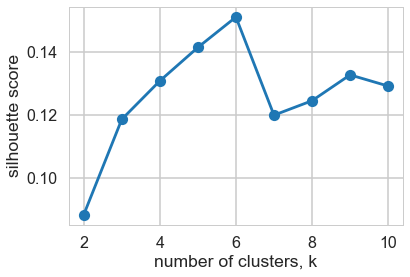

In [107]:
#agglomerative clustering

n_clusts = range(2,11)
silhouette=[]

for k in n_clusts:
    model = AgglomerativeClustering(n_clusters=k)
    labels = model.fit_predict(X)
    silhouette.append(silhouette_score(X, labels))

# Plot 
plt.plot(n_clusts, silhouette, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('silhouette score')

In [108]:
#DBSCAN
model = DBSCAN(eps=2)
labels = model.fit_predict(X)
silhouette = silhouette_score(X, labels)
print('DBSCAN:', silhouette)

DBSCAN: 0.24585173934674312


DBSCAN performed the best, followed by agglomerative clustering.